In [1]:
# Importing necessary libraries
import pandas as pd
import tweepy
import re

In [2]:
# Using the consumer keys and access key to extract the tweets from twitter
consumer_key = "Idi8AXgk1YVbd8KwaOjEL3IXO"
consumer_secret = "WdQkKrqJZbfGctHpxsPy16e6ZKXzQIU1oJQrT549382t9noFp2"
access_key = "1374348926497615874-8y2iKFNcsk25Ba4e2CjXYUMUIRdSyA"
access_secret = "Yw3XPMzp9pUgsHoJvMEFK266iHvyWFue4G65BotJxbAts"


In [3]:
#Tweet extraction
alltweets = []


In [4]:
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [5]:
# Extracting tweets of "Bill Gates"
bill_tweets = get_all_tweets("BillGates")


...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2400 tweets downloaded so far
...2600 tweets downloaded so far
...2800 tweets downloaded so far
...3000 tweets downloaded so far
...3200 tweets downloaded so far
...3208 tweets downloaded so far
...3208 tweets downloaded so far


In [6]:
# Checking the extracted tweets
bill_tweets
# Extracting only the 'text' section of the tweet
bill_tweets["text"]
# Combining all the tweets into a single paragraph
tweet_df = " ".join(bill_tweets["text"])


In [7]:
#Text processing
# Removing all the http links from the tweets
tweet_df = re.sub(r"http\S+", "", tweet_df)



In [27]:
# Removing all the puntuations, numbers and lowering the case of  letters
tweets = re.sub("[^A-Za-z" "]+"," ",tweet_df).lower()
tweets = re.sub("[0-9" "]+"," ",tweets)


In [9]:
# Splitting the paragraph into words
tweet_words = tweets.split(" ")
tweet_words
len(tweet_words)


55830

In [10]:
# Importing the stop words
with open(r"sw.txt","r") as sw:
    stop = sw.read()
stop


"a\nabout\nabove\nafter\nagain\nagainst\nall\nalso\nam\nan\nand\nany\nare\naren't\nas\nat\nbe\nbecause\nbeen\nbefore\nbeing\nbelow\nbetween\nboth\nbut\nby\ncan\ncan't\ncannot\ncom\ncould\ncouldn't\ndid\ndidn't\ndo\ndoes\ndoesn't\ndoing\ndon't\ndown\nduring\neach\nelse\never\nfew\nfor\nfrom\nfurther\nget\nhad\nhadn't\nhas\nhasn't\nhave\nhaven't\nhaving\nhe\nhe'd\nhe'll\nhe's\nhence\nher\nhere\nhere's\nhers\nherself\nhim\nhimself\nhis\nhow\nhow's\nhowever\nhttp\ni\ni'd\ni'll\ni'm\ni've\nif\nin\ninto\nis\nisn't\nit\nit's\nits\nitself\njust\nk\nlet's\nlike\nme\nmore\nmost\nmustn't\nmy\nmyself\nno\nnor\nnot\nof\noff\non\nonce\nonly\nor\nother\notherwise\nought\nour\nours\nourselves\nout\nover\nown\nr\nsame\nshall\nshan't\nshe\nshe'd\nshe'll\nshe's\nshould\nshouldn't\nsince\nso\nsome\nsuch\nthan\nthat\nthat's\nthe\ntheir\ntheirs\nthem\nthemselves\nthen\nthere\nthere's\ntherefore\nthese\nthey\nthey'd\nthey'll\nthey're\nthey've\nthis\nthose\nthrough\nto\ntoo\nunder\nuntil\nup\nvery\nwas\nwasn'

In [11]:
# Removing all the stop words from the tweets
tweets_final = [w for w in tweet_words if not w in stop]
tweets_final
len(tweets_final)


29782

In [12]:
# Joining all the tweet words into one paragraph
tweets_final_string = " ".join(tweets_final)



In [13]:
#Sentimental analysis
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud


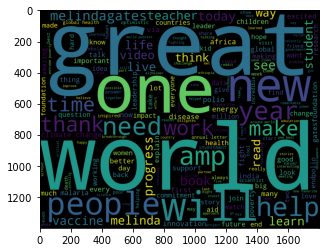

In [14]:
# Plotting a wordcloud with all the unique words in the tweets
wordcloud_tweet = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweets_final_string)
plt.imshow(wordcloud_tweet)


In [15]:
# List of all the unique words in the reviews
tweet_unique = list(set("".join(tweets_final_string).split(" ")))
tweet_unique
len(tweet_unique)


5816

In [16]:
# Importing the positive words
with open(r"positive-words.txt","r") as pos:
    poswords= pos.read().split("\n")
poswords = poswords[36:]

# Importing the negative words
with open(r"negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")

negwords = negwords[37:]


In [24]:
# Joining all the negative words into a paragraph
tweet_neg = " ".join([w for w in tweets_final if w in negwords])



In [18]:
len(tweet_neg)

7730

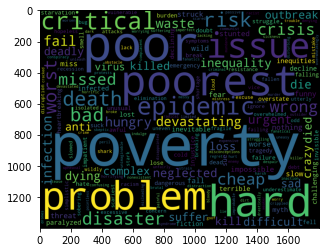

In [19]:
# Builiding wordcloud of negative words
wordcloud_neg = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweet_neg)
plt.imshow(wordcloud_neg)


In [25]:
# Joining all the positive words into a paragraph
tweet_pos= " ".join([w for w in tweets_final if w in poswords])




In [21]:
len(tweet_pos)

27654

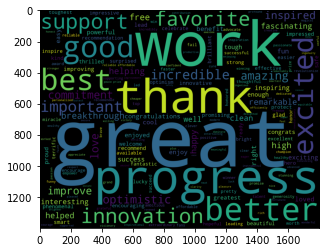

In [22]:
# Builiding wordcloud of positive words
wordcloud_pos = WordCloud(
                background_color="black",
                width=1800,
                height=1400,
                ).generate(tweet_pos)
plt.imshow(wordcloud_pos)


In [26]:
#Most frequent positive words are "great", "progress", "thank","good","work","better"
#Most frequent negative words are "poverty","poorest","poor","problem", "hard"
